In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sales_df=pd.read_csv('data/Nashville_home_sales_data.csv',low_memory=False)

In [3]:
sales_df['Sale Date'] = pd.to_datetime(sales_df['Sale Date'])

In [4]:
start_date = '2014-01-01'
end_date   = '2024-12-31'

In [5]:
sales_df = sales_df[(sales_df['Sale Date'] >= start_date) & (sales_df['Sale Date'] <= end_date)]

In [6]:
single_family=sales_df[sales_df['Land Use Description']=='SINGLE FAMILY'].copy()

In [7]:
single_family['Sale Year'] = single_family['Sale Date'].dt.year
single_family['Sale Month'] = single_family['Sale Date'].dt.month
single_family['Sale Month Name'] = single_family['Sale Date'].dt.month_name()

In [8]:
single_family['Parcel Zip Code'] = single_family['Parcel Zip Code'].astype(int)

In [9]:
single_family.head()

,OBJECTID,APN,Feature Type,Floor Number,Parcel ID,Census Tract,Council District,Tax District,Owner,Sale Date,...,Land Appraised Value,Improvement Appraised Value,Total Appraised Value,Zoning,Shape__Area,Latitude,Longitude,Sale Year,Sale Month,Sale Month Name
0,1,186040A17200CO,Lot,NaN,361372.0,37019114.0,33.0,GSD,"CLARK, HERSHEL WAYNE",2021-10-06 05:00:00,...,120000.0,338000.0,458000.0,R8,6786.003601,35.988913,-86.675994,2021,10,October
2,3,186040A17500CO,Lot,NaN,361375.0,37019114.0,33.0,GSD,"FERGUSON, MARK A. & LAURA DURHAM",2014-08-22 05:00:00,...,120000.0,403500.0,523500.0,R8,8075.191406,35.989286,-86.675635,2014,8,August
4,5,186040A18400CO,Lot,NaN,361384.0,37019114.0,33.0,GSD,SFR JV-2 2024-2 BORROWER LLC,2024-06-05 05:00:00,...,120000.0,359200.0,479200.0,RS10,7048.799194,35.989502,-86.673896,2024,6,June
5,6,186040A18900CO,Lot,NaN,361389.0,37019114.0,33.0,GSD,"HUFF, DEBORAH SUZAN",2015-05-27 05:00:00,...,120000.0,404700.0,524700.0,RS10,8412.827393,35.989014,-86.674476,2015,5,May
7,8,186040A19300CO,Lot,NaN,361393.0,37019114.0,33.0,GSD,"KENNEDY, RONALD WILLIAM SR & DARLEEN GAIL",2020-04-17 05:00:00,...,120000.0,319300.0,439300.0,R8,6050.071777,35.988885,-86.675141,2020,4,April


In [10]:
single_family.columns

Index(['OBJECTID', 'APN', 'Feature Type', 'Floor Number', 'Parcel ID',
       'Census Tract', 'Council District', 'Tax District', 'Owner',
       'Sale Date', 'Sale Price', 'Owner Instrument', 'Owner Address 1',
       'Owner Address 2', 'Owner Address 3', 'Owner City', 'Owner State',
       'Owner Country', 'Owner Zip Code', 'Parcel Address',
       'Parcel House Number', 'Parcel House Number Extension',
       'Parcel Street Name', 'Parcel Suite/Unit Number', 'Parcel City',
       'Parcel State', 'Parcel Zip Code', 'Legal Description',
       'Parcel Instrument', 'Parcel Date', 'Acres', 'Frontage (ft)',
       'Side (ft)', 'Is Regular Shape?', 'Land Use Code',
       'Land Use Description', 'Land Appraised Value',
       'Improvement Appraised Value', 'Total Appraised Value', 'Zoning',
       'Shape__Area', 'Latitude', 'Longitude', 'Sale Year', 'Sale Month',
       'Sale Month Name'],
      dtype='object')

In [11]:
unique_zips = single_family['Parcel Zip Code'].unique()

In [12]:
unique_zips

array([37135, 37207, 37076, 37013, 37217, 37027, 37209, 37211, 37208,
       37189, 37138, 37206, 37221, 37214, 37215, 37220, 37204, 37203,
       37218, 37212, 37216, 37205, 37080, 37115, 37210, 37072, 37122,
       37143, 37015, 37201, 37064, 37213, 37086])

In [13]:
mortgage_rate_30=pd.read_csv('data/mortgage_rate_30.csv')

In [14]:
mortgage_rate_30.head()

,observation_date,MORTGAGE30US
0,2014-01-02,4.53
1,2014-01-09,4.51
2,2014-01-16,4.41
3,2014-01-23,4.39
4,2014-01-30,4.32


In [15]:
mortgage_rate_15=pd.read_csv('data/mortgage_rate_15.csv')

In [16]:
mortgage_rate_15.head()

,observation_date,MORTGAGE15US
0,2014-01-02,3.55
1,2014-01-09,3.56
2,2014-01-16,3.45
3,2014-01-23,3.44
4,2014-01-30,3.40


In [17]:
mortgage_rate_30['observation_date'] = pd.to_datetime(mortgage_rate_30['observation_date'])
mortgage_rate_15['observation_date'] = pd.to_datetime(mortgage_rate_15['observation_date'])

In [18]:
mortgage_rate = pd.merge(mortgage_rate_30, mortgage_rate_15, on='observation_date')

In [19]:
mortgage_rate['Year'] = mortgage_rate['observation_date'].dt.year
mortgage_rate['Month_Name'] = mortgage_rate['observation_date'].dt.month_name()

In [20]:
mortgage_rate.head()

,observation_date,MORTGAGE30US,MORTGAGE15US,Year,Month_Name
0,2014-01-02,4.53,3.55,2014,January
1,2014-01-09,4.51,3.56,2014,January
2,2014-01-16,4.41,3.45,2014,January
3,2014-01-23,4.39,3.44,2014,January
4,2014-01-30,4.32,3.40,2014,January


In [21]:
redfin_df=pd.read_csv('data/redfin_data.csv')

In [22]:
redfin_df.head()

,Region,Month,Year,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,"Nashville, TN metro area",January,2014,$188K,-2.30%,NaN,"1,725",-26.60%,NaN,"2,883",...,NaN,"10,778",2.70%,NaN,105,13,NaN,97.00%,-0.30%,NaN
1,"Nashville, TN metro area",February,2014,$182K,-2.90%,10.00%,"1,820",5.50%,3.90%,"2,993",...,-4.40%,"11,408",5.80%,-8.40%,102,-3,-11.0,97.10%,0.10%,0.70%
2,"Nashville, TN metro area",March,2014,$190K,4.30%,15.20%,"2,433",33.70%,-1.40%,"3,775",...,5.90%,"12,043",5.60%,-6.20%,91,-11,-17.0,97.60%,0.50%,0.60%
3,"Nashville, TN metro area",April,2014,$194K,1.90%,7.60%,"2,679",10.10%,-1.00%,"4,105",...,-0.60%,"12,877",6.90%,-5.00%,73,-18,-13.0,97.50%,-0.10%,0.20%
4,"Nashville, TN metro area",May,2014,$200K,3.40%,6.10%,"3,024",12.90%,0.90%,"3,953",...,5.30%,"13,133",2.00%,-4.20%,70,-3,-11.0,97.80%,0.20%,0.10%


In [23]:
redfin_df['Median Sale Price'] = (redfin_df['Median Sale Price'].str.replace('$','').str.replace('K','000').astype(float))

In [24]:
cols = ['Homes Sold', 'New Listings', 'Inventory']
for col in cols:
    redfin_df[col] = redfin_df[col].str.replace(',', '').astype(int)

In [25]:
redfin_df.head()

,Region,Month,Year,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,"Nashville, TN metro area",January,2014,188000.0,-2.30%,NaN,1725,-26.60%,NaN,2883,...,NaN,10778,2.70%,NaN,105,13,NaN,97.00%,-0.30%,NaN
1,"Nashville, TN metro area",February,2014,182000.0,-2.90%,10.00%,1820,5.50%,3.90%,2993,...,-4.40%,11408,5.80%,-8.40%,102,-3,-11.0,97.10%,0.10%,0.70%
2,"Nashville, TN metro area",March,2014,190000.0,4.30%,15.20%,2433,33.70%,-1.40%,3775,...,5.90%,12043,5.60%,-6.20%,91,-11,-17.0,97.60%,0.50%,0.60%
3,"Nashville, TN metro area",April,2014,194000.0,1.90%,7.60%,2679,10.10%,-1.00%,4105,...,-0.60%,12877,6.90%,-5.00%,73,-18,-13.0,97.50%,-0.10%,0.20%
4,"Nashville, TN metro area",May,2014,200000.0,3.40%,6.10%,3024,12.90%,0.90%,3953,...,5.30%,13133,2.00%,-4.20%,70,-3,-11.0,97.80%,0.20%,0.10%


In [26]:
redfin_df.columns

Index(['Region', 'Month', 'Year', 'Median Sale Price',
       'Median Sale Price MoM ', 'Median Sale Price YoY ', 'Homes Sold',
       'Homes Sold MoM ', 'Homes Sold YoY ', 'New Listings',
       'New Listings MoM ', 'New Listings YoY ', 'Inventory', 'Inventory MoM ',
       ' Inventory YoY ', 'Days on Market', 'Days on Market MoM',
       'Days on Market YoY', 'Average Sale To List',
       'Average Sale To List MoM ', 'Average Sale To List YoY '],
      dtype='object')

Total sales by zip code for each year

In [27]:
sales_count = single_family.groupby(['Parcel Zip Code', 'Sale Year']).size().reset_index(name='SalesCount')

In [28]:
sales_count

,Parcel Zip Code,Sale Year,SalesCount
0,37013,2014,606
1,37013,2015,734
2,37013,2016,916
3,37013,2017,1049
4,37013,2018,1157
...,...,...,...
325,37221,2020,563
326,37221,2021,573
327,37221,2022,534
328,37221,2023,493


number of  home sales by year

In [29]:
sales_count_by_year = single_family.groupby('Sale Year').size().reset_index(name='NumHomesSold')

In [30]:
sales_count_by_year

,Sale Year,NumHomesSold
0,2014,4656
1,2015,5266
2,2016,6084
3,2017,6490
4,2018,6792
5,2019,8225
6,2020,9906
7,2021,11170
8,2022,10288
9,2023,9070


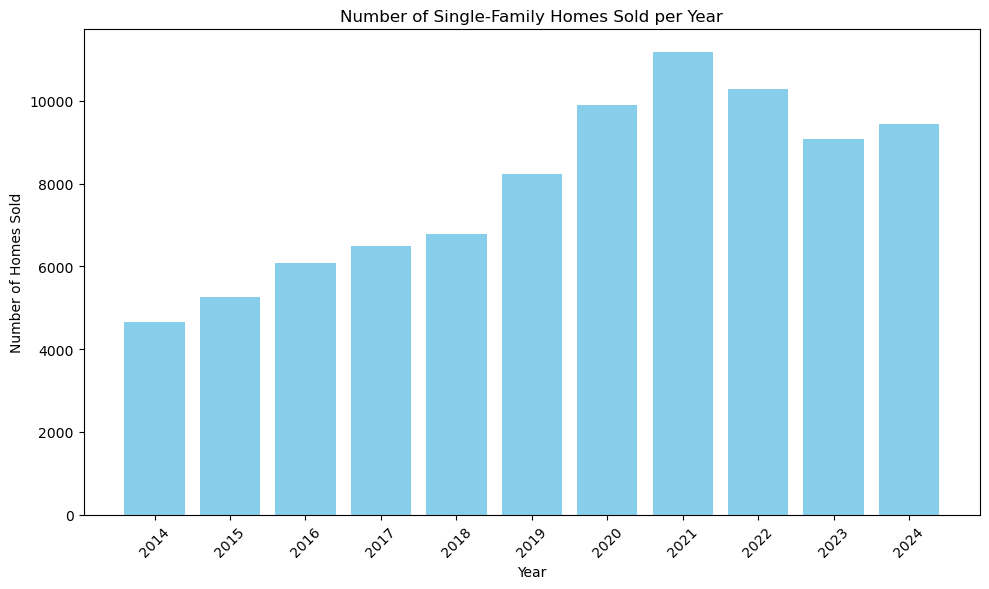

In [31]:
plt.figure(figsize=(10,6))
plt.bar(sales_count_by_year['Sale Year'], sales_count_by_year['NumHomesSold'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Homes Sold')
plt.title('Number of Single-Family Homes Sold per Year')
plt.xticks(sales_count_by_year['Sale Year'], rotation=45)
plt.tight_layout()
plt.show()

In [32]:
avg_price_by_year = single_family.groupby('Sale Year')['Sale Price'].mean().reset_index().round(2)

In [33]:
avg_price_by_year

,Sale Year,Sale Price
0,2014,191667.25
1,2015,214257.36
2,2016,253814.21
3,2017,320533.90
4,2018,369090.61
5,2019,557530.67
6,2020,438748.86
7,2021,651515.60
8,2022,610171.61
9,2023,677173.09


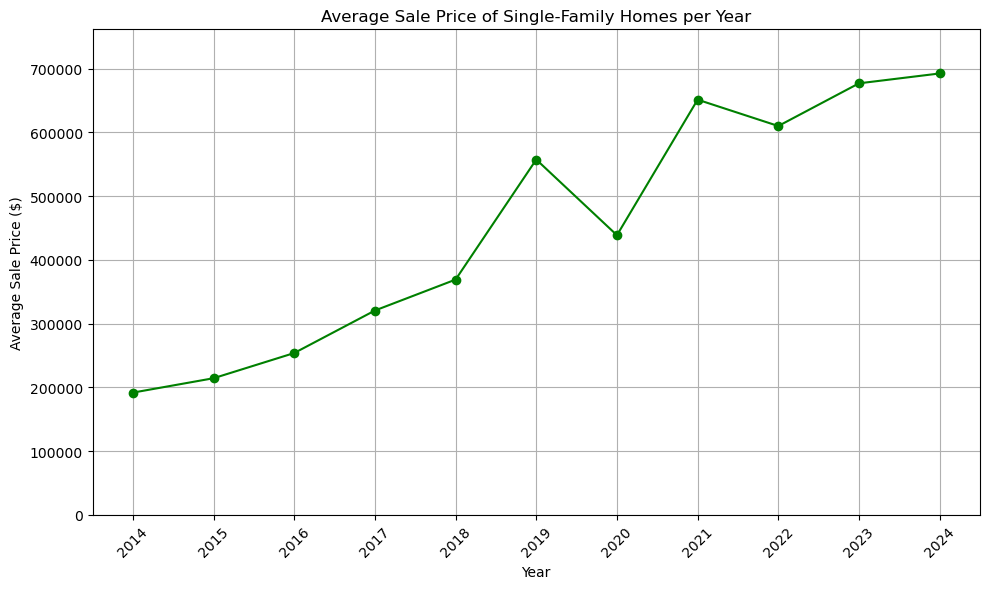

In [34]:
plt.figure(figsize=(10,6))
plt.plot(avg_price_by_year['Sale Year'], avg_price_by_year['Sale Price'], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Average Sale Price ($)')
plt.title('Average Sale Price of Single-Family Homes per Year')
plt.xticks(avg_price_by_year['Sale Year'], rotation=45)
plt.ylim(0, avg_price_by_year['Sale Price'].max() * 1.1)  # start at 0, end slightly above max
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
price_by_city = (single_family.groupby('Parcel City')['Sale Price'].median().reset_index().sort_values('Sale Price'))

In [36]:
price_by_city

,Parcel City,Sale Price
8,LAVERGNE,0.0
1,ASHLAND CITY,136000.0
9,MADISON,229900.0
15,WHITES CREEK,240000.0
14,PEGRAM,255000.0
5,GOODLETTSVILLE,260001.0
7,JOELTON,265000.0
13,OLD HICKORY,265000.0
0,ANTIOCH,271000.0
2,BELLEVUE,275000.0


In [37]:
single_family.head()

,OBJECTID,APN,Feature Type,Floor Number,Parcel ID,Census Tract,Council District,Tax District,Owner,Sale Date,...,Land Appraised Value,Improvement Appraised Value,Total Appraised Value,Zoning,Shape__Area,Latitude,Longitude,Sale Year,Sale Month,Sale Month Name
0,1,186040A17200CO,Lot,NaN,361372.0,37019114.0,33.0,GSD,"CLARK, HERSHEL WAYNE",2021-10-06 05:00:00,...,120000.0,338000.0,458000.0,R8,6786.003601,35.988913,-86.675994,2021,10,October
2,3,186040A17500CO,Lot,NaN,361375.0,37019114.0,33.0,GSD,"FERGUSON, MARK A. & LAURA DURHAM",2014-08-22 05:00:00,...,120000.0,403500.0,523500.0,R8,8075.191406,35.989286,-86.675635,2014,8,August
4,5,186040A18400CO,Lot,NaN,361384.0,37019114.0,33.0,GSD,SFR JV-2 2024-2 BORROWER LLC,2024-06-05 05:00:00,...,120000.0,359200.0,479200.0,RS10,7048.799194,35.989502,-86.673896,2024,6,June
5,6,186040A18900CO,Lot,NaN,361389.0,37019114.0,33.0,GSD,"HUFF, DEBORAH SUZAN",2015-05-27 05:00:00,...,120000.0,404700.0,524700.0,RS10,8412.827393,35.989014,-86.674476,2015,5,May
7,8,186040A19300CO,Lot,NaN,361393.0,37019114.0,33.0,GSD,"KENNEDY, RONALD WILLIAM SR & DARLEEN GAIL",2020-04-17 05:00:00,...,120000.0,319300.0,439300.0,R8,6050.071777,35.988885,-86.675141,2020,4,April


In [38]:
import pytidycensus as tc
import requests

C:\Users\lukem\AppData\Local\Temp\ipykernel_36556\1944532410.py:1: UserWarning: Mapping functions unavailable due to import error: NameError. To use mapping features, ensure all dependencies are properly installed: pip install pytidycensus[map]
  import pytidycensus as tc


In [39]:
API_KEY = '5206a3fd5690e9a1ab1ce6fb7d2fbdbd52895891'

In [40]:
zip_codes = ['37135', '37207', '37076', '37013', '37217', '37027', '37209', '37211',
    '37208', '37189', '37138', '37206', '37221', '37214', '37215', '37220',
    '37204', '37203', '37218', '37212', '37216', '37205', '37080', '37115',
    '37210', '37072', '37122', '37143', '37015', '37201', '37064', '37213', '37086']

In [41]:
variables = {
    'B01003_001E': 'Population',
    'B19013_001E': 'MedianIncome',
    'B25077_001E': 'MedianHomeValue',
    'B25064_001E': 'MedianRent',
    'B25002_001E': 'TotalHousingUnits',
    'B25003_002E': 'OccupiedUnits',
    'B25003_003E': 'VacantUnits',
    'B17001_001E': 'PovertyUniverse',
    'B17001_002E': 'BelowPoverty'}

In [42]:
years = ['2018', '2019', '2020', '2021', '2022', '2023']

In [43]:
def get_acs_data(year):
    base_url = f'https://api.census.gov/data/{year}/acs/acs5'
    all_data = []
    for zcta in zip_codes:
        response = requests.get(base_url, params={
            'get': ','.join(variables.keys()),
            'for': f'zip code tabulation area:{zcta}',
            'key': API_KEY})
        if response.status_code == 200 and len(response.json()) > 1:
            row = response.json()[1]
            record = {'ZCTA': zcta, 'ACS_Year': year}
            for i, var in enumerate(variables.keys()):
                record[variables[var]] = row[i]
            all_data.append(record)
        else:
            print(f'No data for ZCTA {zcta} in {year}')
    return pd.DataFrame(all_data)

In [44]:
df_list = []
for year in years:
    print(f'Pulling ACS {year} data...')
    df_year = get_acs_data(year)
    df_list.append(df_year)
census_data = pd.concat(df_list, ignore_index=True)

Pulling ACS 2018 data...
No data for ZCTA 37135 in 2018
No data for ZCTA 37207 in 2018
No data for ZCTA 37076 in 2018
No data for ZCTA 37013 in 2018
No data for ZCTA 37217 in 2018
No data for ZCTA 37027 in 2018
No data for ZCTA 37209 in 2018
No data for ZCTA 37211 in 2018
No data for ZCTA 37208 in 2018
No data for ZCTA 37189 in 2018
No data for ZCTA 37138 in 2018
No data for ZCTA 37206 in 2018
No data for ZCTA 37221 in 2018
No data for ZCTA 37214 in 2018
No data for ZCTA 37215 in 2018
No data for ZCTA 37220 in 2018
No data for ZCTA 37204 in 2018
No data for ZCTA 37203 in 2018
No data for ZCTA 37218 in 2018
No data for ZCTA 37212 in 2018
No data for ZCTA 37216 in 2018
No data for ZCTA 37205 in 2018
No data for ZCTA 37080 in 2018
No data for ZCTA 37115 in 2018
No data for ZCTA 37210 in 2018
No data for ZCTA 37072 in 2018
No data for ZCTA 37122 in 2018
No data for ZCTA 37143 in 2018
No data for ZCTA 37015 in 2018
No data for ZCTA 37201 in 2018
No data for ZCTA 37064 in 2018
No data for ZC

In [45]:
for col in census_data.columns:
    if col not in ['ZCTA', 'ACS_Year']:
        census_data[col] = pd.to_numeric(census_data[col], errors='coerce')

In [46]:
census_data['PctVacant'] = (census_data['VacantUnits'] / census_data['TotalHousingUnits']) * 100
census_data['PctBelowPoverty'] = (census_data['BelowPoverty'] / census_data['PovertyUniverse']) * 100

In [47]:
census_data

,ZCTA,ACS_Year,Population,MedianIncome,MedianHomeValue,MedianRent,TotalHousingUnits,OccupiedUnits,VacantUnits,PovertyUniverse,BelowPoverty,PctVacant,PctBelowPoverty
0,37135,2020,17318,128281,441700,1625,5396,4981,375,17275,234,6.949592,1.354559
1,37207,2020,39151,50583,186700,954,16604,8793,6358,39024,8616,38.291978,22.078721
2,37076,2020,38647,64392,230900,1149,18196,9697,6985,38515,3854,38.387558,10.006491
3,37013,2020,99109,60602,205800,1182,39126,20207,16010,98569,15801,40.919082,16.030395
4,37217,2020,30947,50423,194800,1027,14169,5890,6834,30899,5724,48.232056,18.524871
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,37015,2023,19547,74848,259500,1244,8366,5905,1635,19280,1185,19.543390,6.146266
128,37201,2023,1426,88438,391900,1944,1525,380,446,1137,205,29.245902,18.029903
129,37064,2023,66641,121492,664000,1810,25302,18916,5339,66062,3685,21.101099,5.578093
130,37213,2023,35,-666666666,-666666666,-666666666,12,0,12,12,0,100.000000,0.000000


In [48]:
income_population_df=pd.read_csv('data/income_population_data.csv')

In [49]:
income_population_df

,Year,median income,mean income,population
0,2014,47211,66776,1792468
1,2015,51393,71138,1830298
2,2016,54310,75847,1865535
3,2017,57737,79221,1904226
4,2018,60324,84780,1932099
5,2019,63462,89742,1933860
6,2020,62087,86197,1989519
7,2021,64857,95481,2013506
8,2022,71767,103671,2046715
9,2023,80217,111644,2104235


In [51]:
total_homes_sold=single_family.shape[0]

In [52]:
total_homes_sold

87395

In [53]:
avg_annual_sales = single_family.groupby('Sale Year').size().mean()

In [54]:
avg_annual_sales

np.float64(7945.0)

In [75]:
median_price_2014 = single_family[single_family['Sale Year'] == 2014]['Sale Price'].median()
median_price_2024 = single_family[single_family['Sale Year'] == 2024]['Sale Price'].median()

In [76]:
median_price_2014

138500.0

In [77]:
median_price_2024

450000.0

In [61]:
price_growth_pct = ((median_price_2024 - median_price_2014) / median_price_2014) * 100

In [60]:
price_growth_pct

224.90974729241879

In [59]:
avg_median_income = census_data['MedianIncome'].replace(-666666666, pd.NA).mean()

In [62]:
avg_median_income

np.float64(82883.3984375)

In [63]:
population_by_year = (census_data.groupby('ACS_Year')['Population'].sum().reset_index())

In [64]:
avg_population = population_by_year['Population'].mean()

In [65]:
avg_population

np.float64(981955.0)

In [66]:
census_data['MedianRent'] = census_data['MedianRent'].replace(-666666666, pd.NA)

In [67]:
census_data = census_data.dropna(subset=['MedianRent'])

In [68]:
avg_median_rent = census_data['MedianRent'].mean()

In [69]:
avg_median_rent

np.float64(1413.5078125)

In [70]:
avg_mortgage_rate = mortgage_rate['MORTGAGE30US'].mean()

In [71]:
avg_mortgage_rate

np.float64(4.459407665505227)